# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
ff = df.drop(columns = ['id','date','price','zipcode','lat','long'])

for column in ff:
  plt.scatter(ff[column],df.price)
  plt.title(column)
  plt.show()

In [0]:
from sklearn.model_selection import train_test_split
X=df.sqft_living15.values[:,np.newaxis]
y=df.price.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.5)


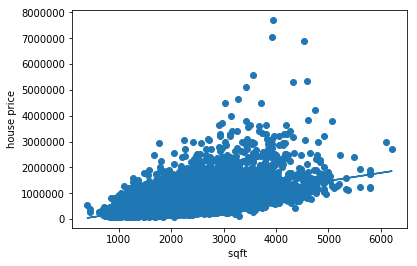

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train,y_train)

m_hat = model.coef_[0]
b_hat = model.intercept_

plt.scatter(X,y)

y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)

plt.ylabel('house price')
plt.xlabel('sqft ')
plt.show()

In [18]:
y_test_predict = model.predict(X_test)
MSE = mean_squared_error(y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
R2 = r2_score(y_test, y_test_predict) #higher is better (how much x determines y)

print('Rmse is {}'.format(RMSE),'\nand R^2 is',R2)

Rmse is 310436.3603858935 
and R^2 is 0.32794559547143765


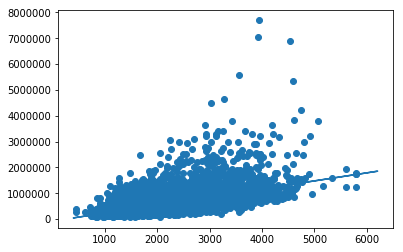

In [19]:
plt.scatter(X_test, y_test)
plt.plot(X, y_hat);

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [26]:
X=df.loc[:,['grade','sqft_living15']].values
y=df.price.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.5)
print(X.shape)
print(y.shape)

(21613, 2)
(21613,)


In [0]:
model = LinearRegression()
model.fit(X_train,y_train)

m_hat = model.coef_[0]
b_hat = model.intercept_

#plt.scatter(X,y)

#y_hat = [m_hat*x + b_hat for x in X]
#plt.plot(X, y_hat)

#plt.ylabel('house price')
#plt.xlabel('sqft ')
#plt.show()

In [29]:
y_test_predict = model.predict(X_test)
MSE = mean_squared_error(y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
R2 = r2_score(y_test, y_test_predict) 

print('Rmse is {}'.format(RMSE),'\nand R^2 is',R2)

Rmse is 272404.52916270413 
and R^2 is 0.46604868738267236


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [30]:
X=ff.values
y=df.price.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.5)
model = LinearRegression()
model.fit(X_train,y_train)
y_test_predict = model.predict(X_test)
MSE = mean_squared_error(y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
R2 = r2_score(y_test, y_test_predict)

print('Rmse is {}'.format(RMSE),'\nand R^2 is',R2)

Rmse is 223668.76257620292 
and R^2 is 0.6464658107374491


In [33]:
X=df.drop(columns=['price','id','date']).values
y=df.price.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.5)
model = LinearRegression()
model.fit(X_train,y_train)
y_test_predict = model.predict(X_test)
MSE = mean_squared_error(y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
R2 = r2_score(y_test, y_test_predict)

print('Rmse is {}'.format(RMSE),'\nand R^2 is',R2)

Rmse is 205039.76200101528 
and R^2 is 0.6987157932755301


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
